## Examples of how to do the following in Python
1. Matrix / vector creation, slicing, manipulation
2. Plotting 
3. Use and create functions
4. Conditional statements (for, if, while, etc)
5. Logical indexing
6. Linear regression
7. Non-linear regression


### 1. Matrix / vector creation, slicing, manipulation

In [23]:
# Random 100 X 10 Matrix 
import numpy as np
A = np.random.rand( 100,10) 
A.shape

(100, 10)

In [24]:
# Random 10 X 1 vector 
b = np.random.rand(10,1); 
b.shape

(10, 1)

In [25]:
# get the first 10 elements of b
b[0:10]

array([[ 0.59080695],
       [ 0.13603371],
       [ 0.98416236],
       [ 0.84465811],
       [ 0.66154939],
       [ 0.714179  ],
       [ 0.41412117],
       [ 0.53565212],
       [ 0.52915034],
       [ 0.4898343 ]])

In [26]:
# transpose the first 10 elements of b
b[0:10].T

array([[ 0.59080695,  0.13603371,  0.98416236,  0.84465811,  0.66154939,
         0.714179  ,  0.41412117,  0.53565212,  0.52915034,  0.4898343 ]])

In [28]:
# matrix multiplication
y = np.dot(A,b);
y.shape

(100, 1)

### 2. Plotting

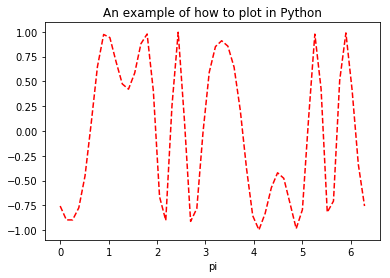

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# define variables
x = np.linspace(0,2*np.pi,50);
y = np.sin(3*x + 4*np.cos(2*x));

# plot
plt.plot(x, y, "r--")
# make it pretty
plt.title("An example of how to plot in Python")
plt.xlabel("pi");

### 3. Use and create functions

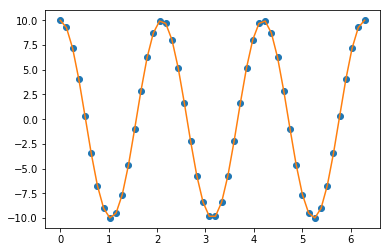

In [38]:
# inline
my_function = lambda xdata, scale: scale * np.cos(3*xdata);
    
# logn style
def my_function_long(xdata, scale):
    return scale * np.cos(3*xdata)

#plot 
plt.plot(x, my_function(x, 10), "o");
plt.plot(x, my_function_long(x, 10), "-");

### 4. Conditional statements (for, if, while, etc)

In [40]:
numbers = np.random.randn( 10 )

# note that you can use an iterator !!!
for num in numbers:
    if num < 0:
        print("< 0")

< 0
< 0
< 0
< 0
< 0
< 0


In [42]:
# same loop witout an iterator
for i in range(numbers.shape[0]):
    num = numbers[i]
    if num < 0:
        print("< 0")

< 0
< 0
< 0
< 0
< 0
< 0


## 5. Logical indexing ( very different than Python and Matlan)

In [44]:
numbers < 0 # This does not work in Julia

array([False,  True,  True,  True, False, False,  True, False,  True,  True], dtype=bool)

In [45]:
numbers[1] < 0

True

In [47]:
# use the boolean operators
numbers[numbers < 0]

array([-0.99884548, -1.13989601, -2.52373566, -0.40080109, -0.07089368,
       -0.98248956])

## 6. Linear regression

The predicted slope is [ 3.3]
The predicted intercep is [ 2.]


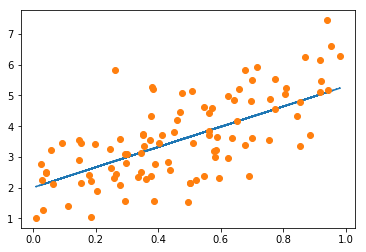

In [97]:
# Linear Algebra style
# For single linear regresion y= mx + b
m = 3.3; b = 2; x = np.random.rand(100,1)
y = m * x + b
# add noise
yn = y + np.random.randn(  *y.shape )

# plot
plt.plot(x,y,"--")
plt.plot(x,yn,"o")

# regression
X = np.zeros( (100,2) ) ;  X[:,0] = x.squeeze() ; X[:,1] = 1.0
coeff_pred, *trash = np.linalg.lstsq(X,y)

slope =  np.round(coeff_pred[0], decimals = 2)
intercept = np.round(coeff_pred[1], decimals = 2)

print("The predicted slope is " + str(slope) )
print("The predicted intercep is " + str(intercept) )    

## 7. Non-linear regression $$ y = Mz * e^{ (x / T_2 )} $$


[ 1.17230311  0.22152994]


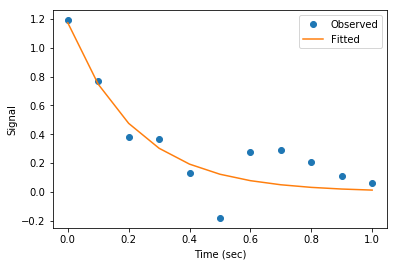

In [15]:
from scipy.optimize import curve_fit
import numpy as np

# "collect" some data
xdata = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0];
xdata = np.array(xdata)

ydata= [1.19, 0.77, 0.38,  0.37,  0.13, -0.18,  0.28,  0.29,  0.21,  0.11,  0.06]
ydata = np.array(ydata)

def fit_t2_exp(x,y, initial_guess):
    #model
    def t2(x_,*pars):
        return pars[0] * np.exp(-x_ / pars[1])

    #fit
    fitted_pars, cov= curve_fit(t2, x, y, p0 = initial_guess)
    
    plt.plot(x,y,"o"); plt.plot(x, t2(x, *fitted_pars))
    plt.legend(["Observed", "Fitted"])
    plt.xlabel("Time (sec)")
    plt.ylabel("Signal")
    return fitted_pars, cov

p0 = [1., 0.25]
fitted_pars, errors = fit_t2_exp(xdata,ydata, p0);
print(fitted_pars)